In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
# Set up
import sys

sys.path.append("/home/dchen/BA_CH_EN/")

# Basics
import tensorflow as tf
import xarray as xr
import numpy as np
from scipy.stats import norm
import scipy.stats as stats
import matplotlib.pyplot as plt
import random

# Helpful
from tqdm import tqdm

# Visualization
import matplotlib.pyplot as plt

# My Methods
from src.utils.CRPS import *  # CRPS metrics
from src.utils.data_split import *  # Splitting data into X and y
from src.utils.drn_make_X_array import *  # Import make train array functions (make_X_array)
from src.models.EMOS import *  # EMOS implementation
from src.models.DRN.DRN_model import *  # DRN implementation
from src.models.DRN.DRN_load_preds import *
from src.models.DRN.DRN_load_preds_dummy_10 import *
from src.models.EMOS_local.EMOS_local_load_preds import *  # Load EMOS_global_preds
from src.models.EMOS_global.EMOS_global_load_score import *  # Load EMOS_global_scores
from src.models.EMOS_global.EMOS_global_load_preds import *  # Load EMOS_global_preds
from src.models.EMOS_global.EMOS_global_load_model import *  # Load EMOS_global_models
import data.raw.load_data_raw as ldr  # Load raw data
import data.processed.load_data_processed as ldp  # Load processed data normed
import data.processed.load_data_processed_denormed as ldpd  # Load processed data denormed
from src.models.CRPS_baseline.CRPS_load import *  # Load CRPS scores
from src.models.U_net.u_net_load_score import *
from src.models.U_net.u_net_load_preds import *
from src.models.U_net.u_net_load_preds import *

<IPython.core.display.Javascript object>

### 0. Setup

In [3]:
var_names = ["u10", "v10", "t2m", "t850", "z500", "ws10"]
random.seed(7)
# setup:
ran_lat = random.randint(0, 119)
ran_lon = random.randint(0, 129)
ran_forecast_date = random.randint(0, 356)
ran_lead_time = random.randint(0, 30)
lead_times = [1, 15, 30]  # Lead times to plot boxplot with
lead_time = 0

<IPython.core.display.Javascript object>

### 1. Load Predictions

In [22]:
ensemble_t2m_preds = dat_test_denorm[2].t2m_test
ensemble_ws10_preds = dat_test_denorm[5].ws10_test

# EMOS_global
EMOS_global_t2m_preds = EMOS_global_load_preds("t2m")
EMOS_global_ws10_preds = EMOS_global_load_preds("ws10")

# EMOS_local
EMOS_local_t2m_preds = EMOS_local_load_preds("t2m")
EMOS_local_ws10_preds = EMOS_local_load_preds("ws10")

# DRN
DRN_t2m_preds = DRN_load_preds_dummy_10("t2m")
DRN_ws10_preds = DRN_load_preds_dummy_10("ws10")

# U_net
u_net_t2m_preds = u_net_load_preds("t2m")
u_net_ws10_preds = u_net_load_preds("ws10")

<IPython.core.display.Javascript object>

### 2. Heatmap

#### 2.1 Heatmap mean predictions

In [4]:
def plot_heatmaps_mean(random_forecast_date, lead_time=0, days_back=0, lead_hour="6h"):
    # Load predictions
    EMOS_global_t2m_preds = EMOS_global_load_preds("t2m")
    EMOS_global_ws10_preds = EMOS_global_load_preds("ws10")
    EMOS_local_t2m_preds = EMOS_local_load_preds("t2m")
    EMOS_local_ws10_preds = EMOS_local_load_preds("ws10")
    DRN_t2m_preds = DRN_load_preds_dummy_10("t2m")
    DRN_ws10_preds = DRN_load_preds_dummy_10("ws10")
    u_net_t2m_preds = u_net_load_preds("t2m")
    u_net_ws10_preds = u_net_load_preds("ws10")

    models_t2m = [
        EMOS_global_t2m_preds,
        EMOS_local_t2m_preds,
        DRN_t2m_preds,
        u_net_t2m_preds,
    ]
    models_ws10 = [
        EMOS_global_ws10_preds,
        EMOS_local_ws10_preds,
        DRN_ws10_preds,
        u_net_ws10_preds,
    ]
    model_names = ["EMOS global", "EMOS local", "DRN", "U-net"]

    # Create figure with 4x2 subplots
    fig, axes = plt.subplots(4, 2, figsize=(10, 20))

    for i in range(4):
        # t2m heatmap
        t2m_data = models_t2m[i][lead_time][(random_forecast_date - days_back), :, :, 0]
        im_t2m = axes[i, 0].imshow(t2m_data, cmap="inferno", interpolation="nearest")
        axes[i, 0].set_title(f"{model_names[i]}: t2m, lead time: {lead_hour}")
        fig.colorbar(im_t2m, ax=axes[i, 0])

        # ws10 heatmap
        ws10_data = np.abs(
            models_ws10[i][lead_time][(random_forecast_date - days_back), :, :, 0]
        )
        im_ws10 = axes[i, 1].imshow(ws10_data, cmap="viridis", interpolation="nearest")
        axes[i, 1].set_title(f"{model_names[i]}: ws10, lead time: {lead_hour}")
        fig.colorbar(im_ws10, ax=axes[i, 1])

    plt.savefig(
        f"/home/dchen/BA_CH_EN/reports/figures/prediction_heat_maps_mean_lead_time_{lead_hour}.png",
    )
    plt.tight_layout()
    plt.show()

<IPython.core.display.Javascript object>

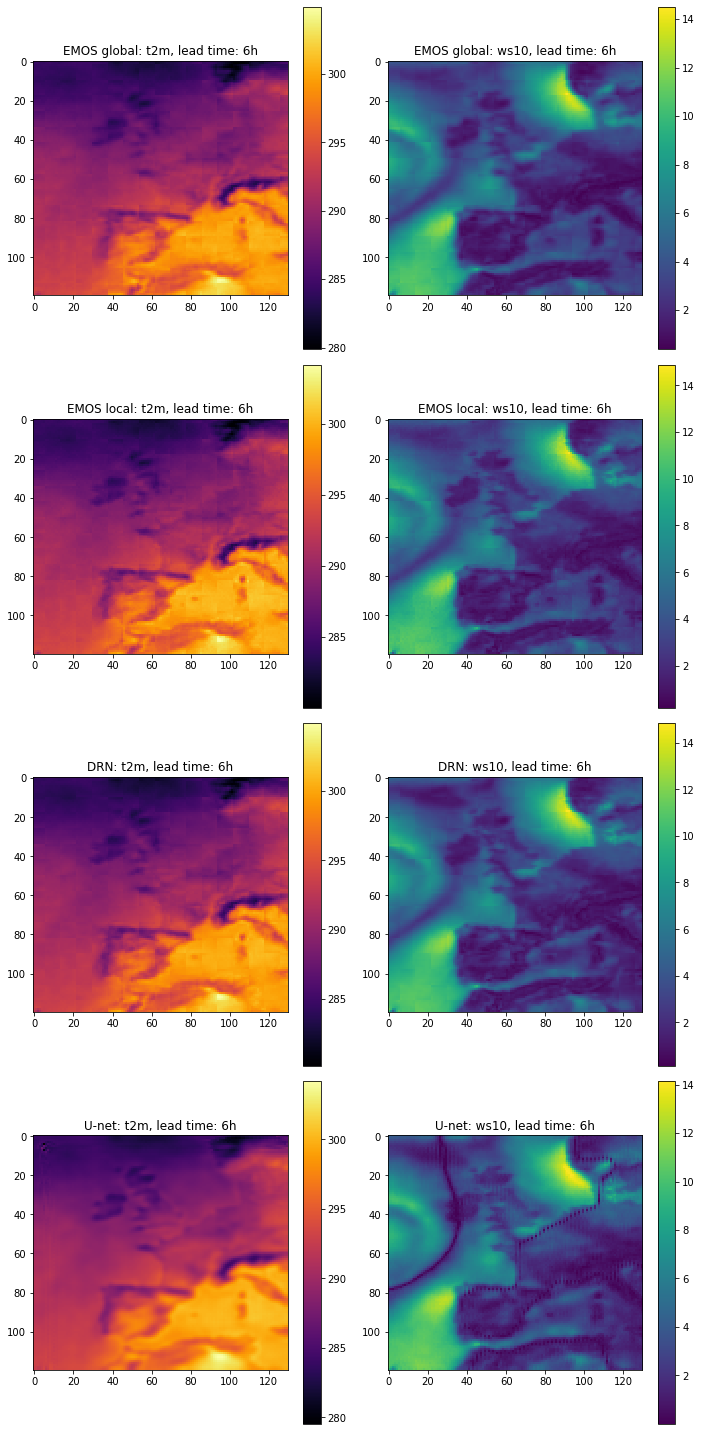

<IPython.core.display.Javascript object>

In [5]:
# Call the function
plot_heatmaps_mean(ran_forecast_date, lead_time=0, days_back=0, lead_hour="6h")
# lead_time =  0, days_back= 0, real_hours = '6h'
# lead_time = 16, days_back =  4, real_hours = '102h'
# lead_time = 28, days_back = 7, real_hours = '174h'

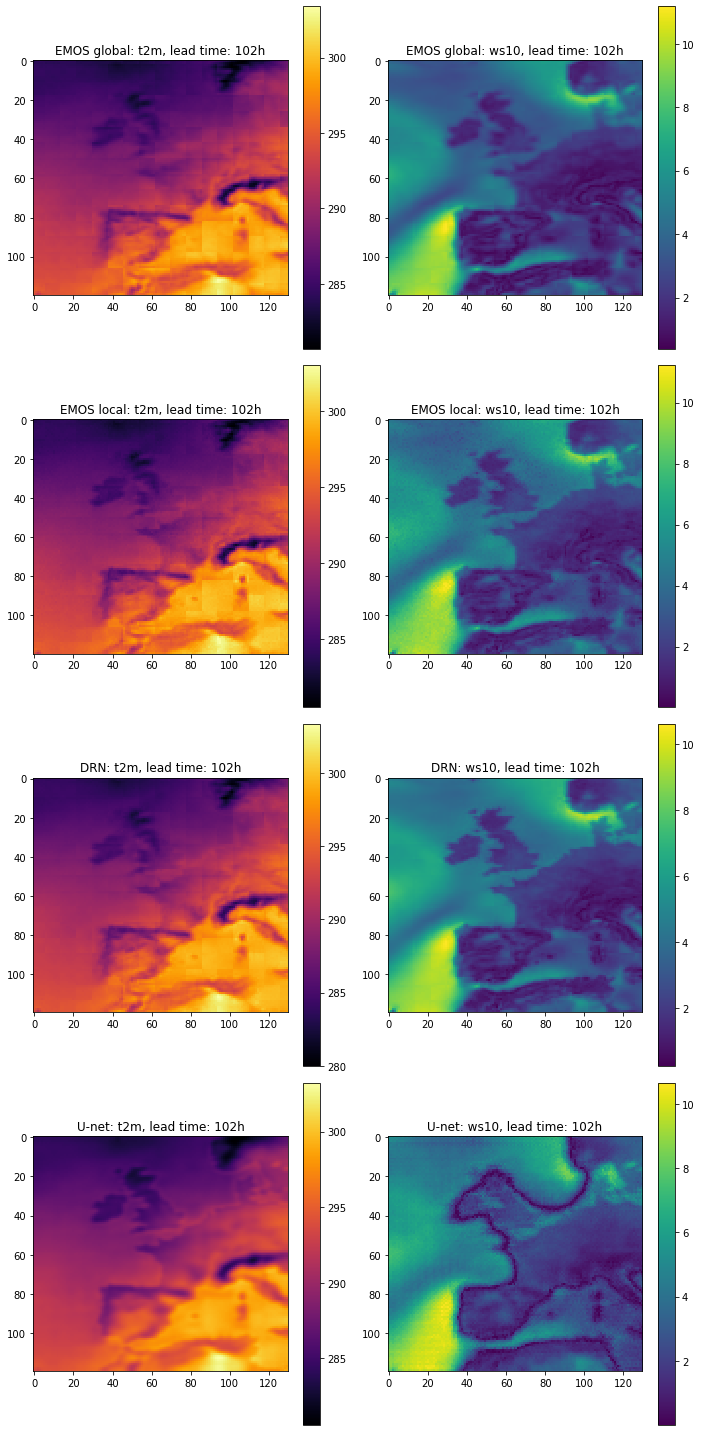

<IPython.core.display.Javascript object>

In [6]:
plot_heatmaps_mean(ran_forecast_date, lead_time=16, days_back=4, lead_hour="102h")

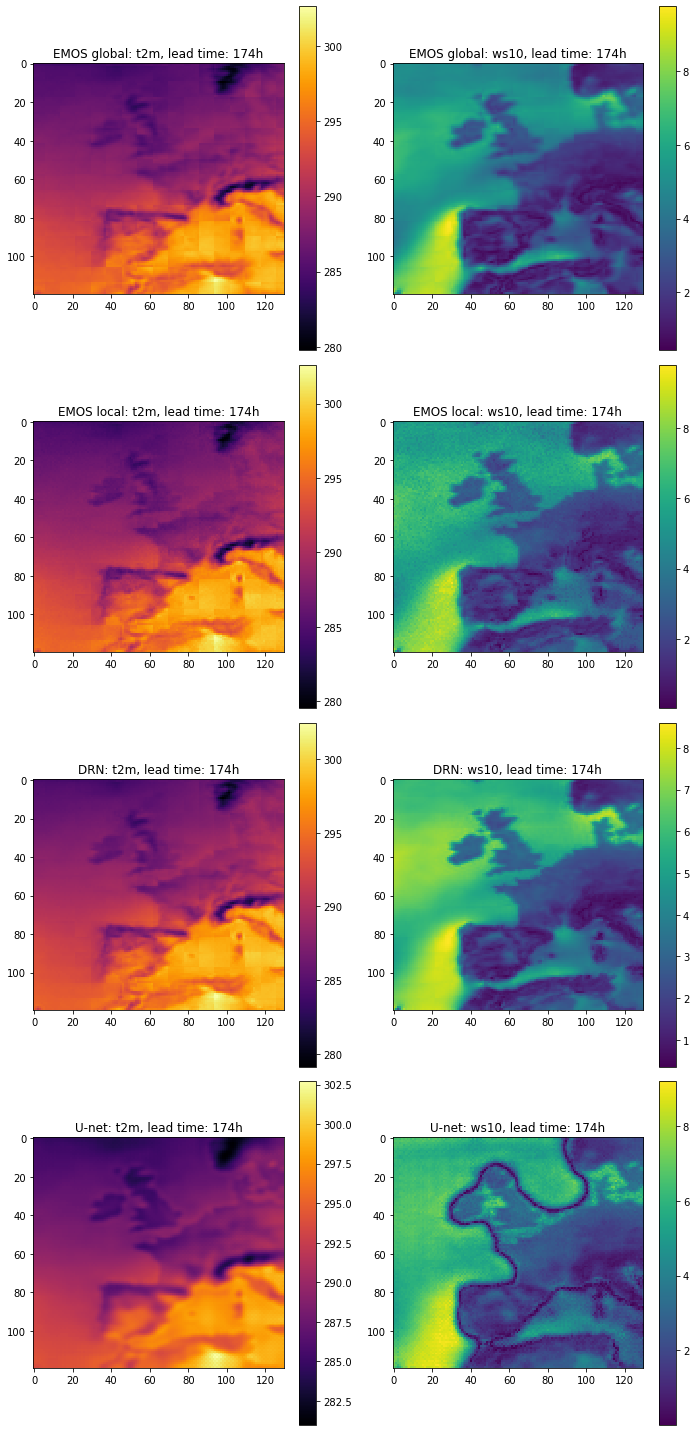

<IPython.core.display.Javascript object>

In [7]:
plot_heatmaps_mean(ran_forecast_date, lead_time=28, days_back=7, lead_hour="174h")

#### 3.2 Std Heatmaps

In [9]:
def plot_heatmaps_std(random_forecast_date, lead_time=0, days_back=0, lead_hour="6h"):
    # Load predictions
    EMOS_global_t2m_preds = EMOS_global_load_preds("t2m")
    EMOS_global_ws10_preds = EMOS_global_load_preds("ws10")
    EMOS_local_t2m_preds = EMOS_local_load_preds("t2m")
    EMOS_local_ws10_preds = EMOS_local_load_preds("ws10")
    DRN_t2m_preds = DRN_load_preds_dummy_10("t2m")
    DRN_ws10_preds = DRN_load_preds_dummy_10("ws10")
    u_net_t2m_preds = u_net_load_preds("t2m")
    u_net_ws10_preds = u_net_load_preds("ws10")

    models_t2m = [
        EMOS_global_t2m_preds,
        EMOS_local_t2m_preds,
        DRN_t2m_preds,
        u_net_t2m_preds,
    ]
    models_ws10 = [
        EMOS_global_ws10_preds,
        EMOS_local_ws10_preds,
        DRN_ws10_preds,
        u_net_ws10_preds,
    ]
    model_names = ["EMOS global", "EMOS local", "DRN", "U-net"]

    # Create figure with 4x2 subplots
    fig, axes = plt.subplots(4, 2, figsize=(10, 20))

    for i in range(4):
        # t2m heatmap
        t2m_data = np.abs(
            models_t2m[i][lead_time][(random_forecast_date - days_back), :, :, 1]
        )  # Assuming first index is lead time
        im_t2m = axes[i, 0].imshow(t2m_data, cmap="inferno", interpolation="nearest")
        axes[i, 0].set_title(f"{model_names[i]}: t2m, lead time: {lead_hour}")
        fig.colorbar(im_t2m, ax=axes[i, 0])

        # ws10 heatmap
        ws10_data = np.abs(
            models_ws10[i][lead_time][random_forecast_date - days_back, :, :, 1]
        )
        im_ws10 = axes[i, 1].imshow(ws10_data, cmap="viridis", interpolation="nearest")
        axes[i, 1].set_title(f"{model_names[i]}: ws10, lead time: {lead_hour}")
        fig.colorbar(im_ws10, ax=axes[i, 1])
    plt.savefig(
        f"/home/dchen/BA_CH_EN/reports/figures/prediction_heat_maps_std_lead_time_{lead_hour}.png",
    )
    plt.tight_layout()
    plt.show()

<IPython.core.display.Javascript object>

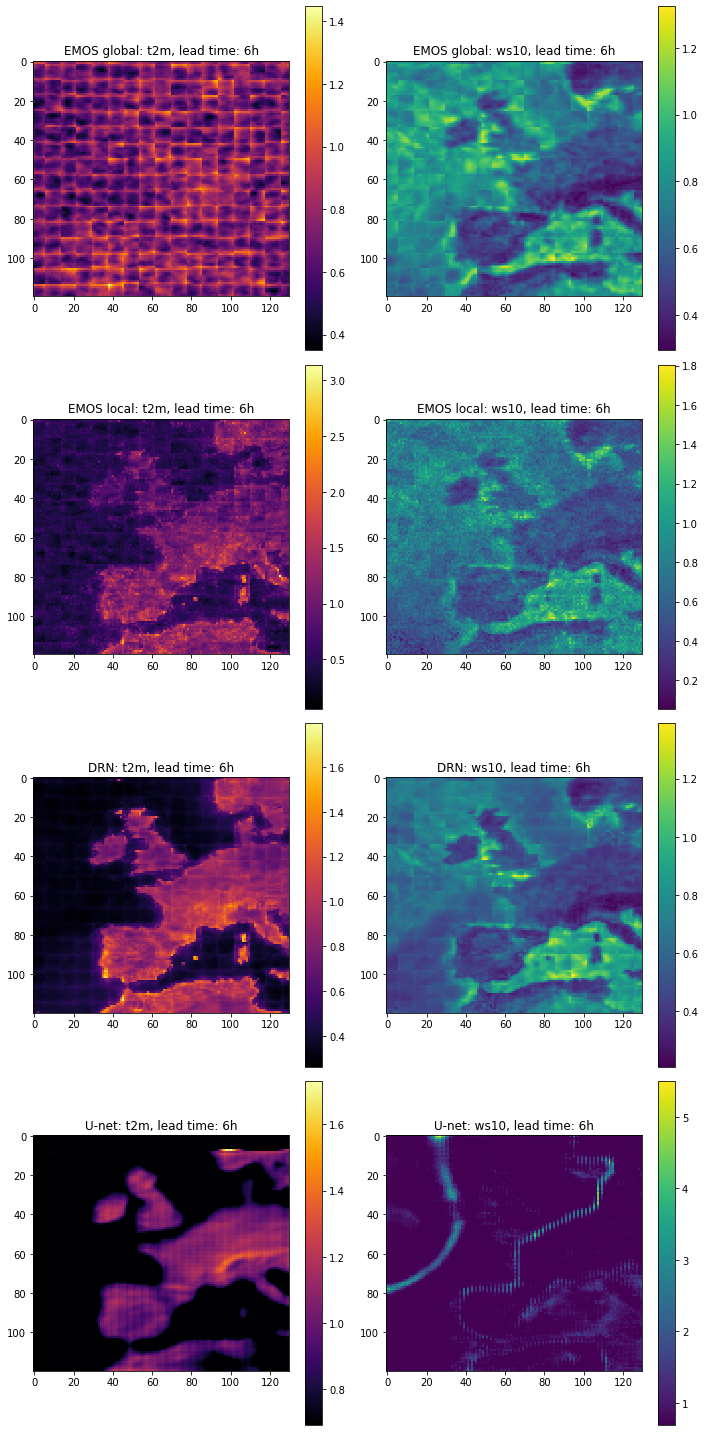

<IPython.core.display.Javascript object>

In [10]:
# Call the function
plot_heatmaps_std(ran_forecast_date)

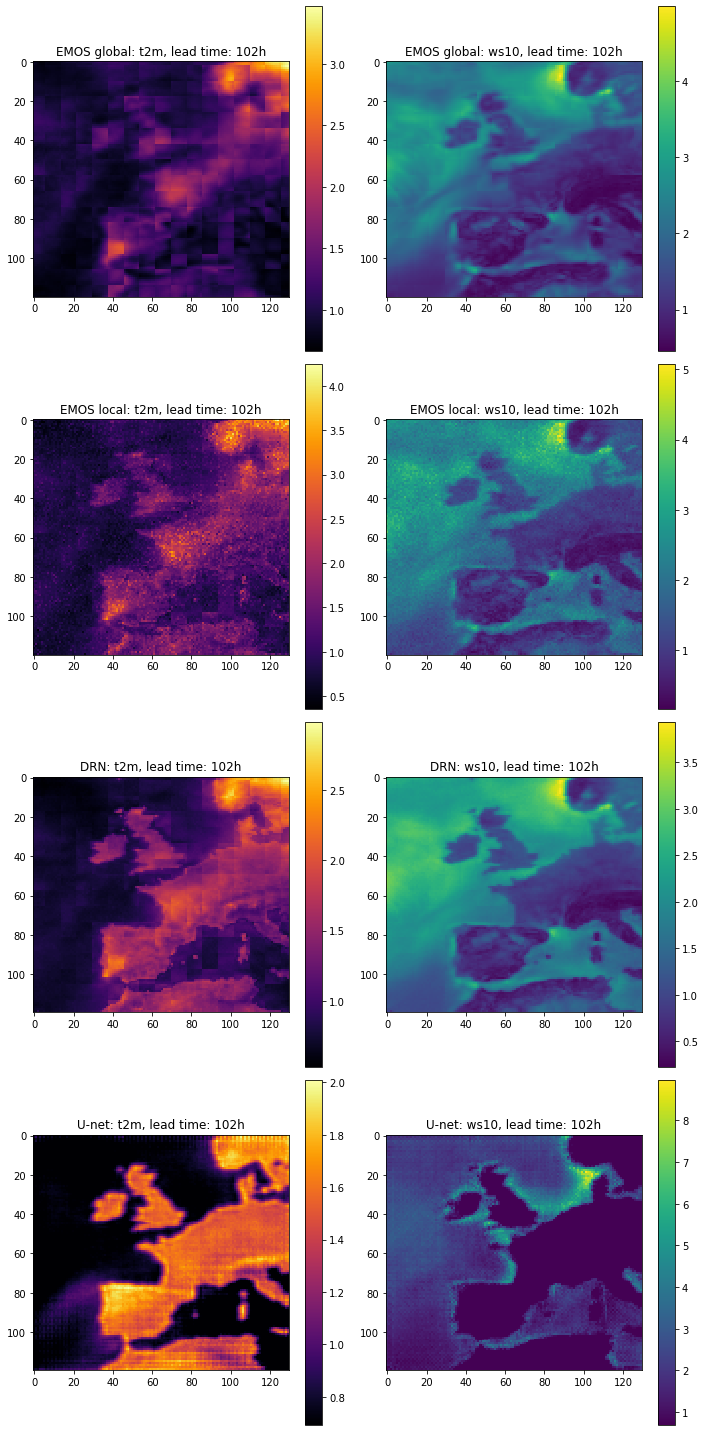

<IPython.core.display.Javascript object>

In [11]:
plot_heatmaps_std(ran_forecast_date, lead_time=16, days_back=4, lead_hour="102h")

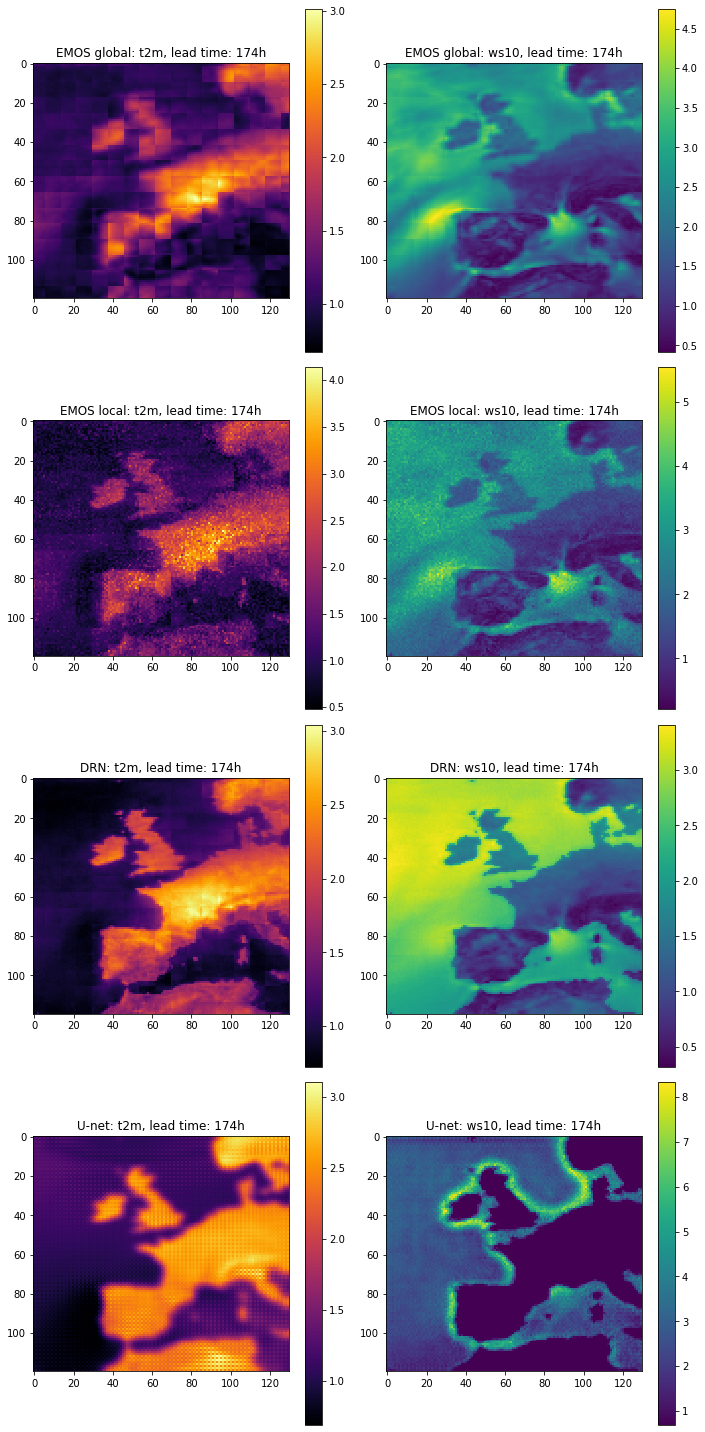

<IPython.core.display.Javascript object>

In [12]:
plot_heatmaps_std(ran_forecast_date, lead_time=28, days_back=7, lead_hour="174h")

### 4. Line Graph- Std

In [33]:
ensemble_t2m_preds

<xarray.DataArray 't2m_test' (forecast_date: 357, lead_time: 32, lat: 120,
                              lon: 130, mean_std: 2)>
[356428800 values with dtype=float32]
Dimensions without coordinates: forecast_date, lead_time, lat, lon, mean_std

<IPython.core.display.Javascript object>

In [23]:
ensemble_t2m_preds = dat_test_denorm[2].t2m_test
ensemble_ws10_preds = dat_test_denorm[5].ws10_test

# EMOS_global
EMOS_global_t2m_preds = EMOS_global_load_preds("t2m")
EMOS_global_ws10_preds = EMOS_global_load_preds("ws10")

# EMOS_local
EMOS_local_t2m_preds = EMOS_local_load_preds("t2m")
EMOS_local_ws10_preds = EMOS_local_load_preds("ws10")

# DRN
DRN_t2m_preds = DRN_load_preds_dummy_10("t2m")
DRN_ws10_preds = DRN_load_preds_dummy_10("ws10")

# U_net
u_net_t2m_preds = u_net_load_preds("t2m")
u_net_ws10_preds = u_net_load_preds("ws10")

<IPython.core.display.Javascript object>

In [25]:
u_net_t2m_preds[0].shape

(357, 120, 130, 2)

<IPython.core.display.Javascript object>

In [51]:
# Loading functions and prediction variable dictionary
load_functions_dict = {
    "Raw Ensemble": None,
    "EMOS_global": {"t2m": EMOS_global_load_preds, "ws10": EMOS_global_load_preds},
    "EMOS_local": {"t2m": EMOS_local_load_preds, "ws10": EMOS_local_load_preds},
    "DRN": {"t2m": DRN_load_preds_dummy_10, "ws10": DRN_load_preds_dummy_10},
    "U-net": {"t2m": u_net_load_preds, "ws10": u_net_load_preds},
}

# Model order and colors
labels_all = ["Raw Ensemble", "EMOS_global", "EMOS_local", "DRN", "U-net"]
colors_all = ["yellow", "green", "blue", "red", "black"]

def plot_avg_std_dev(variable):
    """Plot mean of std. dev. for each lead time"""

    plt.figure(figsize=(12, 8))

    # Calculate lead times in hours
    lead_times = list(range(6, 187, 6))

    # Iterate over each model in given order
    for label, color in zip(labels_all, colors_all):
        if label == "Raw Ensemble":  # Special case for Raw Ensemble
            if variable == "t2m":
                preds = dat_test_denorm[2].t2m_test
            else:  # ws10
                preds = dat_test_denorm[5].ws10_test
            avg_std_devs = [np.mean(preds.sel(mean_std=1).isel(lead_time=i).values) for i in range(31)]
        else:  # For all other models
            funcs = load_functions_dict[label]
            preds = funcs[variable](variable)  # Load predictions
            avg_std_devs = [np.mean(np.abs(p[..., 1])) for p in preds]  # Average of std. dev. for each lead time

        # Plot
        plt.plot(lead_times, avg_std_devs, label=label, color=color)

    plt.xlabel("Lead Time in Hours")
    plt.ylabel("Average Std. Dev.")
    plt.title(f"Average Std. Dev. over Lead Time for {variable}")
    plt.legend()
    plt.grid(True)
    
    
    plt.savefig(
        f"/home/dchen/BA_CH_EN/reports/figures/prediction_line_plot_average_std_{variable}.pdf"
    )
    plt.show()


<IPython.core.display.Javascript object>

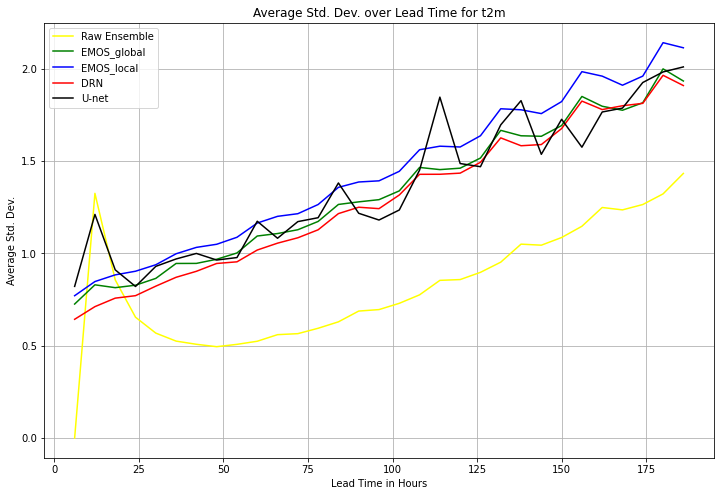

<IPython.core.display.Javascript object>

In [52]:
plot_avg_std_dev("t2m")

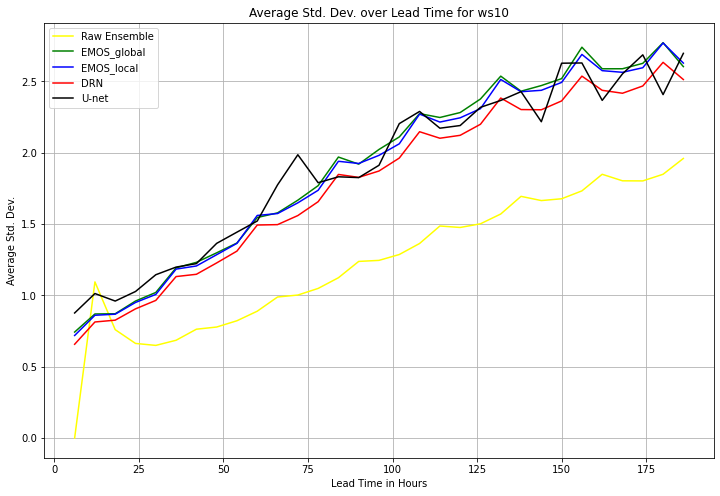

<IPython.core.display.Javascript object>

In [53]:
plot_avg_std_dev("ws10")